## Shek's Guide to RICHTER'S PREDICTOR Modeling Earthquake Damage - DataDriven
Based on aspects of building location and construction, our goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

### Data Loading and Exploration

In [1]:
#importing libraries for loading and preprocessing the data
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import ShuffleSplit

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_values = pd.read_csv(r'C:\\Users\\gsabh\\Desktop\\Kaggle\\Richters_Predictor_Modeling_Earthquake_Damage\\train_values.csv')
train_labels = pd.read_csv(r'C:\\Users\\gsabh\\Desktop\\Kaggle\\Richters_Predictor_Modeling_Earthquake_Damage\\train_labels.csv')
test_values = pd.read_csv(r'C://Users//gsabh//Desktop//Kaggle//Richters_Predictor_Modeling_Earthquake_Damage/test_values.csv')

In [3]:
print('Training data has {} rows and {} columns'.format(train_values.shape[0], train_values.shape[1]))
print('Training labels has {} rows'.format(train_labels.shape[0]))
print('Test data has {} rows and {} columns'.format(test_values.shape[0], test_values.shape[1]))

Training data has 260601 rows and 39 columns
Training labels has 260601 rows
Test data has 86868 rows and 39 columns


In [4]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
numerical = train_values.select_dtypes(exclude='object').columns.to_list()
print("Number of numerical features : ", len(numerical))

categorical = train_values.select_dtypes(include='object').columns.to_list()
print("Number of categorical features: ", len(categorical))

Number of numerical features :  31
Number of categorical features:  8


Sweetviz is an open source Python library that generates beautiful, high-density visualizations. If you've never used it before I highly recommend it. It helps understanding you data without having to plot too many graphs in your notebooks. However, it does have it's drawbacks.<br>
<br>
Firstly, Only BOOLEAN and NUMERICAL features can be targets for now. Hopefully they include categorical features soon.<br>
<br>
Second, One can end up over-relying on these graphs. Consider these as a supliment. Your exploratory analysis should unearth interesting findings in your data by asking well crafted questions. Therein lies the art of Data Science!

In [7]:
import sweetviz as sv
feature_config = sv.FeatureConfig(skip='building_id') #skips ID column
train_report = sv.analyze(train_values, feat_cfg = feature_config, pairwise_analysis = "on")
train_report.show_html() #this opens up an HTML page

In [8]:
train_data = pd.merge(train_values, train_labels, on='building_id', how='inner')

In [9]:
train_data.shape

(260601, 40)

# Exploration

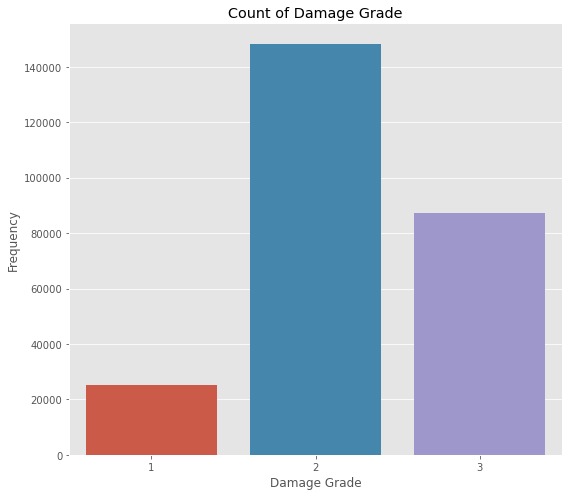

In [10]:
plt.figure(figsize = (8,7))
sns.countplot(x='damage_grade',data=train_data)
plt.xlabel('Damage Grade')
plt.ylabel('Frequency')
plt.title('Count of Damage Grade')
plt.tight_layout()

From the above about 56.89% of the damage grade on the buildings has a severity level medium, followed by high with 33.47% and low 9.64%. This implies that majority of the buildings in nepal has a meduim and high level damage following the earthquake, with only few buildings having low damage grade level.

##### lets take a look at the the taret variable and the other independent variables

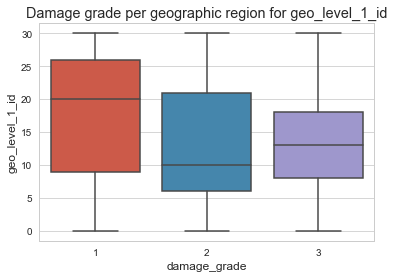

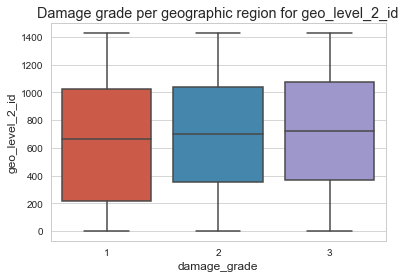

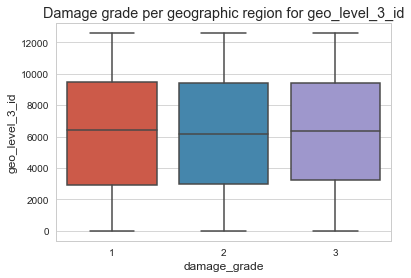

In [11]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.title('Damage grade per geographic region for ' + str(col))
        plt.show()
        

num_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
plot_box(train_data, num_cols)

From the above, we begin by looking at building that exist at geographic level one(1) it appears that most building in this geographic region has a low damage grade with about 75% of the building residing in geographic level 9 to 26, also damage grade on building residing in geographic level two has low damage grade similar to geographic level 1, with about 75% of the building residing from 200 and above. Lastly buildings in geographic level 3 has similar damage grade across all geographic levels.

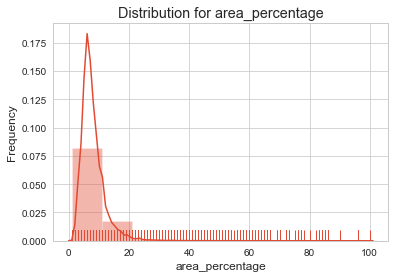

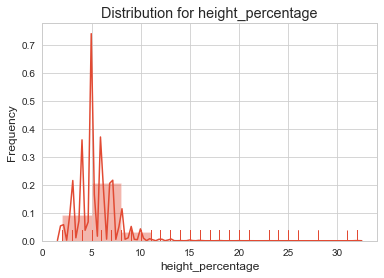

In [12]:
column=['area_percentage', 'height_percentage']
def distplot(df, column, bins = 10, hist = False):
    for col in column:
        sns.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for ' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(train_data, column, hist=True)

The area_percentage and height_percentage are hevily right skewed. We may need to fix this to get better scores later.

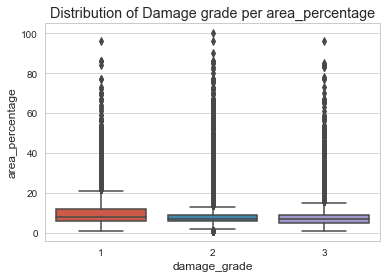

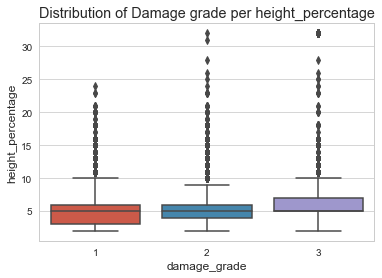

In [13]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.title('Distribution of Damage grade per ' + str(col))
        plt.show()
        

num_cols = ['area_percentage', 'height_percentage']
plot_box(train_data, num_cols)

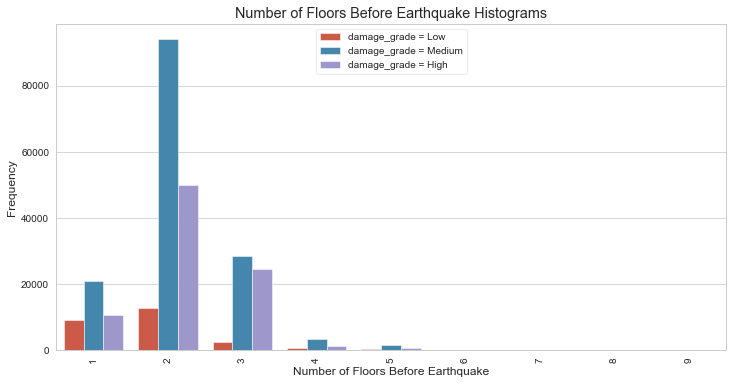

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(train_data["count_floors_pre_eq"], hue=train_data["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Number of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("Number of Floors Before Earthquake Histograms")
plt.legend(["damage_grade = Low","damage_grade = Medium","damage_grade = High"])
plt.show()

<AxesSubplot:title={'center':'Damage distribution of buildings with less than 50 years old'}, xlabel='age', ylabel='count'>

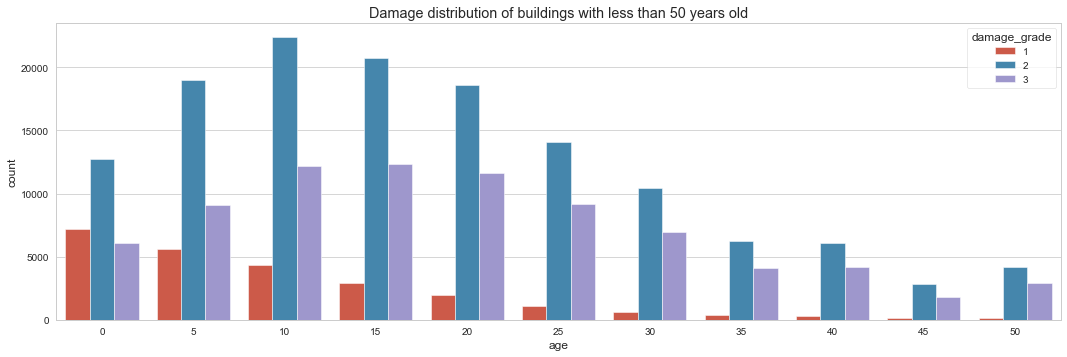

In [15]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings with less than 50 years old')
tr=train_data[train_data['age']<=50]
sns.countplot(x='age',data=tr,hue='damage_grade')

<AxesSubplot:title={'center':'Damage distribution of buildings between the age of 51 and 100 years old'}, xlabel='age', ylabel='count'>

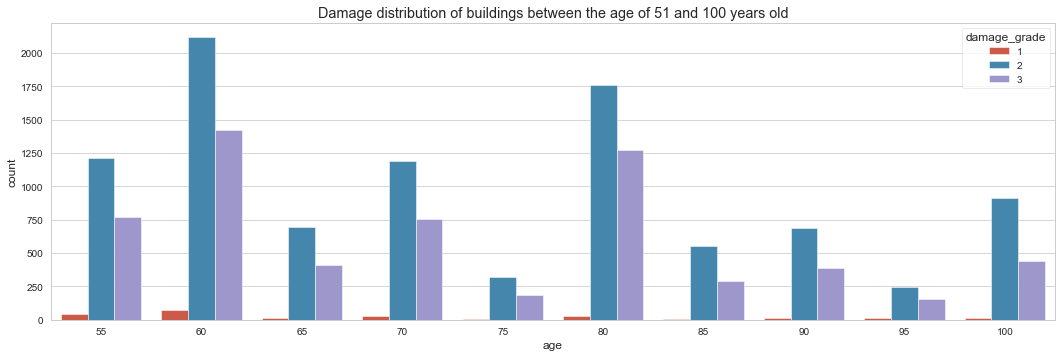

In [16]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 51 and 100 years old')
tr = train_data.loc[(train_data['age'] > 50) & (train_data['age']<=100)]
sns.countplot(x='age',data=tr,hue='damage_grade')

<AxesSubplot:title={'center':'Damage distribution of buildings between the age of 101 and 150 years old'}, xlabel='age', ylabel='count'>

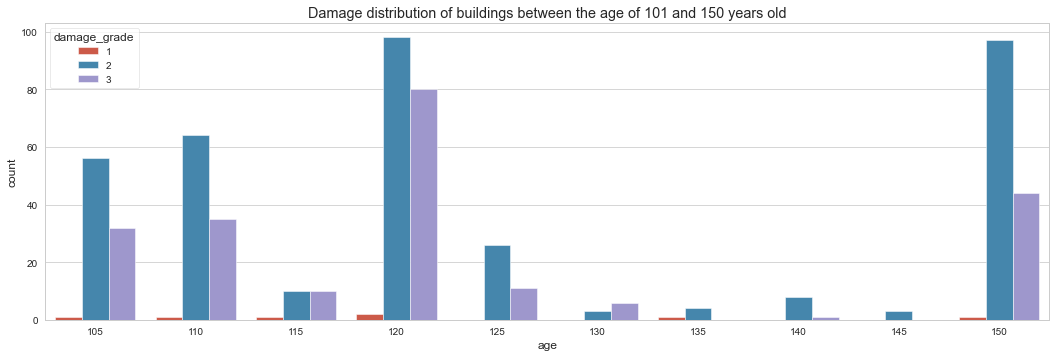

In [17]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 101 and 150 years old')
tr = train_data.loc[(train_data['age'] > 100) & (train_data['age']<=150)]
sns.countplot(x='age',data=tr,hue='damage_grade')

<AxesSubplot:title={'center':'Damage distribution of buildings greater than 150 years old'}, xlabel='age', ylabel='count'>

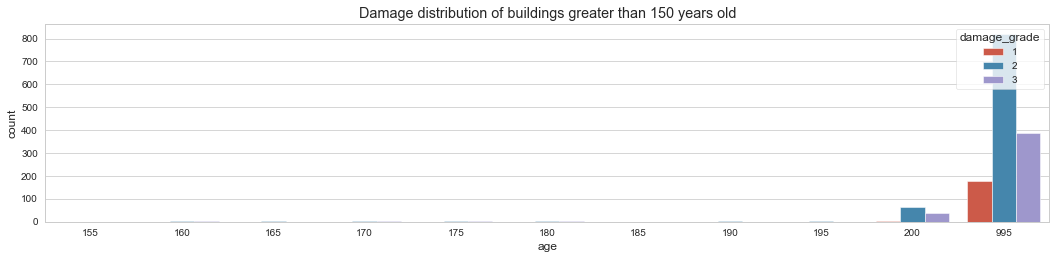

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.title('Damage distribution of buildings greater than 150 years old')
tr=train_data[train_data['age']>150]
sns.countplot(x='age',data=tr,hue='damage_grade')

A significant observation to note from the above chart shows that building with with less than 50 years of age has a dominating damage grade that is medium, with notable increase of damage on buildings between zero to 20 years of age, with a steady decline from 25 years of age to 45 years of age,another interesting observation here is that building with 100 years and 150 years also has a increase in damage grade with severity that is medium. This implies that age has a major factor in determining the level of damage that is going to affeat the building

In [19]:
#concatenote train and test for preprocessing
tt_data = pd.concat([train_data, test_values], axis=0)
tt_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2.0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3.0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2.0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3.0


In [20]:
tt_data.shape

(347469, 40)

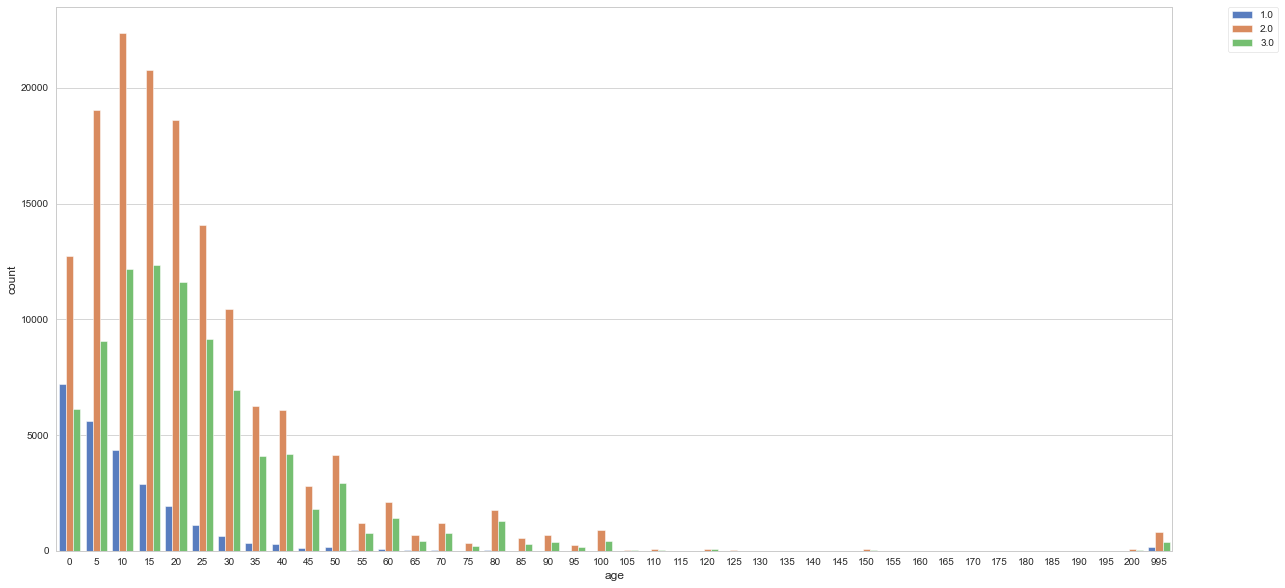

In [21]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="age", hue="damage_grade", palette="muted",data=tt_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Multivariant Analysis

<AxesSubplot:>

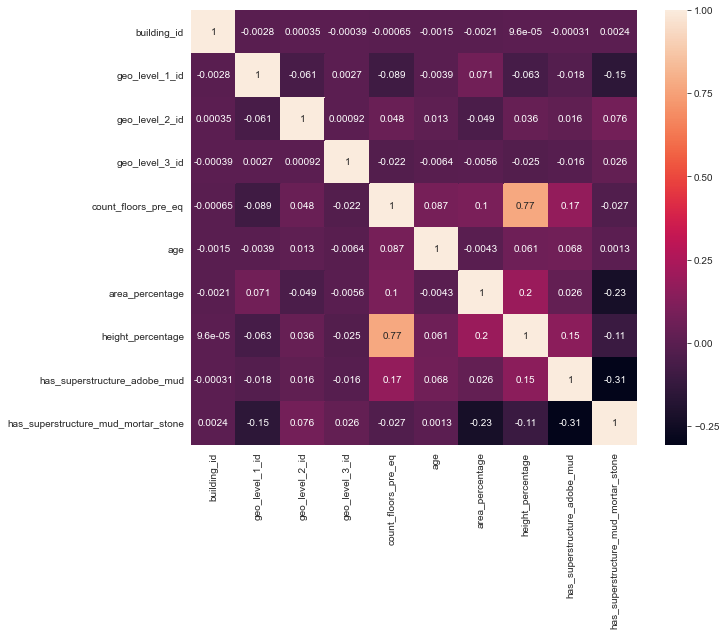

In [22]:
#zoomed in correlation.
corr = tt_data.corr()
f = 10
plt.figure(figsize=(10,8))
sns.heatmap(train_data[corr.T.index[:f]].corr(), annot=True)

In [23]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(tt_data, 0.6)
print('correlated features: ', len(set(corr_features)) )

correlated features:  2


In [24]:
corr_features

{'has_secondary_use_agriculture', 'height_percentage'}

Form the correclation matrix we can see that 'has_secondary_use_agriculture' and 'height_percentage' is highly correlated. We can either drop both or one of them but we cant keep both when building our model

### Data Preprocessing

In [25]:
#checking for null values
tt_data.isna().sum(axis=0).to_frame().T

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,86868


In [1]:
#dropping one of the highly correlated feature.
tt_data.drop(['building_id', 'has_secondary_use_agriculture'], axis=1, inplace=True)

NameError: name 'tt_data' is not defined

In [27]:
tt_data.shape

(347469, 38)

In [28]:
tt_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3.0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2.0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3.0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2.0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3.0


In [29]:
tt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 86867
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   geo_level_1_id                          347469 non-null  int64  
 1   geo_level_2_id                          347469 non-null  int64  
 2   geo_level_3_id                          347469 non-null  int64  
 3   count_floors_pre_eq                     347469 non-null  int64  
 4   age                                     347469 non-null  int64  
 5   area_percentage                         347469 non-null  int64  
 6   height_percentage                       347469 non-null  int64  
 7   land_surface_condition                  347469 non-null  object 
 8   foundation_type                         347469 non-null  object 
 9   roof_type                               347469 non-null  object 
 10  ground_floor_type                       34746

In [30]:
tt_data.dtypes.value_counts()

int64      29
object      8
float64     1
dtype: int64

Let's see what accuracy we can get with the raw data, and then we will try to modify it and decide on the best models

First let's change the object type columns to int

In [31]:
tt_data['land_surface_condition'] = tt_data['land_surface_condition'].map({'n':0, 'o':1, 't':2})
tt_data['foundation_type'] = tt_data['foundation_type'].map({'h':0, 'i':1, 'r':2, 'u':3, 'w':4})
tt_data['roof_type'] = tt_data['roof_type'].map({'n':0, 'q':1, 'x':2})
tt_data['ground_floor_type'] = tt_data['ground_floor_type'].map({'f':0, 'm':1, 'v':2, 'x':3, 'z':4})
tt_data['other_floor_type'] = tt_data['other_floor_type'].map({'j':0, 'q':1, 's':2, 'x':3})
tt_data['position'] = tt_data['position'].map({'j':0, 'o':1, 's':2, 't':3})
tt_data['plan_configuration'] = tt_data['plan_configuration'].map({'a':0, 'c':1, 'd':2, 'f':3, 'm':4, 'n':5, 'o':6, 'q':7, 's':8, 'u':9})
tt_data['legal_ownership_status'] = tt_data['legal_ownership_status'].map({'a':0, 'r':1, 'v':2, 'w':3})

In [32]:
tt_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3.0
1,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,0,0,0,2.0
2,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,0,0,0,3.0
3,22,418,10694,2,10,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,2.0
4,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,0,0,0,3.0


In [33]:
tt_data.dtypes.value_counts()

int64      37
float64     1
dtype: int64

In [34]:
main = tt_data.copy()

In [35]:
train = main.iloc[:train_values.shape[0], :]
test = main.iloc[train_values.shape[0]:, :-1]

In [36]:
train.shape

(260601, 38)

In [37]:
test.shape

(86868, 37)

### Data Modeling
This stage involves training a machine learning model with all the listed features to make predictions for the target variable Damage_Grade. We selected damage grade as the target feature given the goal of the project to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal
To measure the performance of our algorithms, we'll use the F1 score which balances the precision and recall of a classifier.
Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#separate column to be predicted from the rest
y = train.pop('damage_grade') 
x = train.copy()

In [39]:
x.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [41]:
#Let's start by running a RandomForestClassifier on the data
rcf = RandomForestClassifier()
rcf_model = rcf.fit(x_train, y_train)

In [42]:
y_pred = rcf_model.predict(x_test)
f1_score(y_test, y_pred,average='micro')

0.7194210372826204

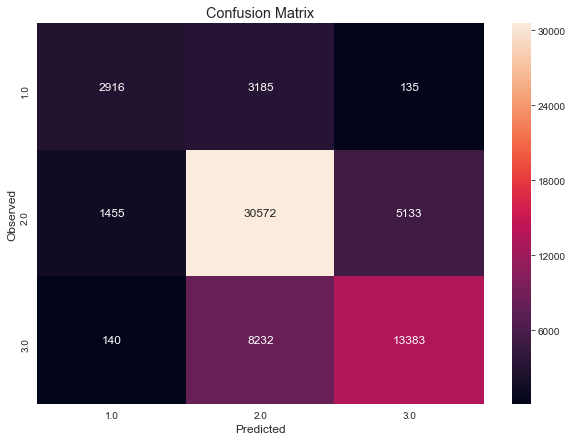

In [43]:
def get_conf_matrix(y_test, y_pred):    
    data = confusion_matrix(y_test, y_pred) #get confusion matrix
    cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test)) #build the confusion matrix as a dataframe table
    cm.index.name = 'Observed'
    cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12}) #plot a heatmap
    plt.title("Confusion Matrix")
    plt.show()
get_conf_matrix(y_test, y_pred)

One way to improve model accuracy is to remove outliers. Plotting boxplots for the most important parameters could help visualize how these look like

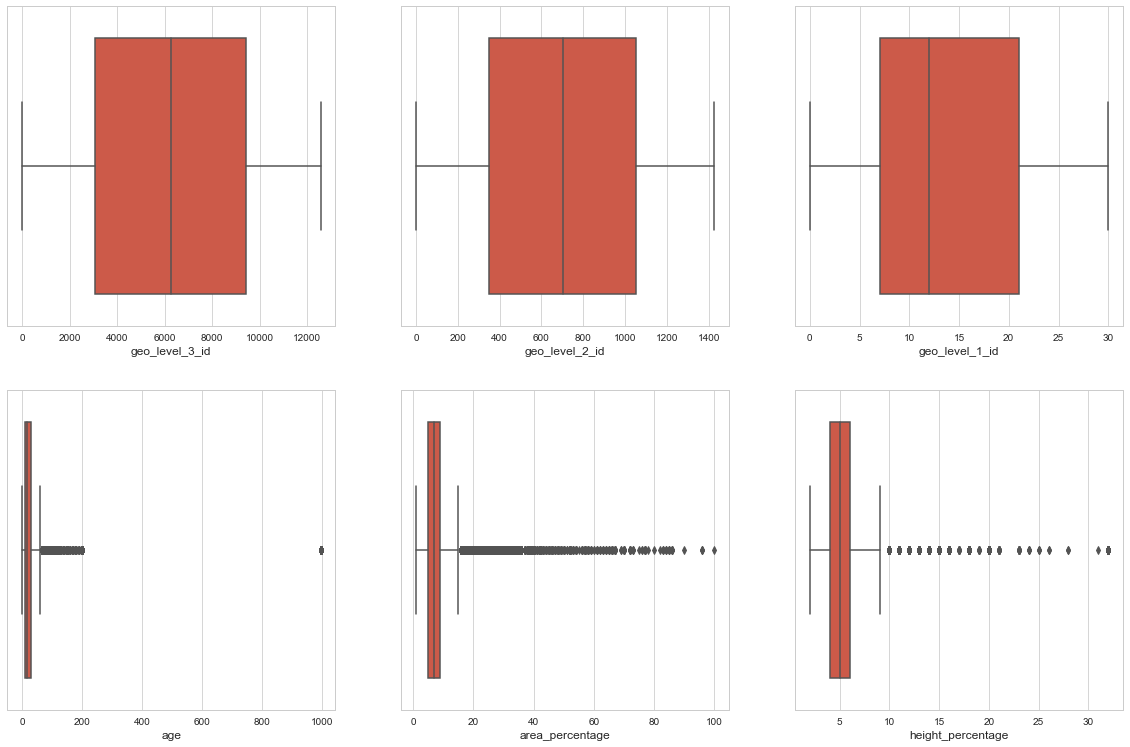

In [44]:
boxplot_cols=["geo_level_3_id","geo_level_2_id","geo_level_1_id","age", "area_percentage", "height_percentage"]
q=1
plt.figure(figsize=(20,20))
for j in boxplot_cols:
    plt.subplot(3,3,q)
    ax=sns.boxplot(train[j].dropna())
    plt.xlabel(j)
    q+=1
plt.show()

Removing the outliers in age did not give any significant boost in out f1 score. We still need to figure out how to handle this.

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import RobustScaler
import xgboost as xgboost

In [46]:
xgb_clf = xgboost.XGBClassifier()
xgb_model = xgb_clf.fit(x_train, y_train)

In [47]:
xgb_y_pred = xgb_model.predict(x_test)
f1_score(y_test, xgb_y_pred,average='micro')

0.729505303065187

In [48]:
importance = pd.DataFrame({"Feature":list(x), "Importance": xgb_model.feature_importances_}) # build a dataframe with features and their importance
importance = importance.sort_values(by="Importance", ascending=False) #sort by importance
importance.T

,15,0,19,9,14,8,16,18,4,1,...,6,12,5,28,32,30,31,33,34,35
Feature,has_superstructure_mud_mortar_stone,geo_level_1_id,has_superstructure_cement_mortar_brick,roof_type,has_superstructure_adobe_mud,foundation_type,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,age,geo_level_2_id,...,height_percentage,position,area_percentage,has_secondary_use_hotel,has_secondary_use_industry,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police
Importance,0.215084,0.0890999,0.0823802,0.0818042,0.0665144,0.0613621,0.0569989,0.052223,0.0247184,0.0211941,...,0.00812343,0.00700698,0.00632197,0.0059336,0.00482271,0.00358843,0.00318268,0.00216779,0.00177831,0.00160308


Since we have an imbalanced class problem, with majority of the classes in the damage 2 category, let's see if using SMOTE to synthetically generate more samples so that we have balanced classes have any significant impact on improving our score.

In [49]:
print("Before OverSampling, counts of label '3': {}".format(sum(y_train == 3))) 
print("Before OverSampling, counts of label '2': {}".format(sum(y_train == 2))) 
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1))) 
  
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
 
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

Before OverSampling, counts of label '3': 65463
Before OverSampling, counts of label '2': 111099
Before OverSampling, counts of label '1': 18888 

After OverSampling, the shape of train_X: (333297, 37)
After OverSampling, the shape of train_y: (333297,) 

After OverSampling, counts of label '3': 111099
After OverSampling, counts of label '2': 111099
After OverSampling, counts of label '1': 111099


In [50]:
xgb_clf_smote = xgboost.XGBClassifier()
xgb_model_smote = xgb_clf_smote.fit(x_train_res, y_train_res)

In [51]:
xgb_smote_y_pred = xgb_model_smote.predict(x_test)
f1_score(y_test, xgb_smote_y_pred,average='micro')

0.7053920891467514

There seems to be no improvement in the score. We'll need to look into this further. 
Since XGB is giving us significantly better results, we'll go with that!

In [52]:
test_y_pred = xgb_model.predict(test)
test_y_pred = test_y_pred.astype('int64')

In [53]:
submission = pd.read_csv('C:/Users/gsabh/Desktop/Kaggle/Richters_Predictor_Modeling_Earthquake_Damage/submission_format.csv')
submission.damage_grade = test_y_pred
submission.to_csv('submission_format.csv', index=False)

My best score: 0.7286 <br>
Best leaderboard score: 0.7558


## OPTIONAL

#### Hyper-parameter tuning
Hyper-parameter tuning is a crucial part of ML if we want to find the best model. First, testing is performed to find an optimal max depth and estimator numbers.

Max depth represents how deep the decision trees in the model will be, while number of estimators indicates how many weak lernears(decision trees) are to be used.

Generally, the larger these are, the better the accuracy of the model is, however going too deep may lead to overfitting and consuming too much computational power for a negligible score increase in return.

Below is a simple timer function that I use in most scripts. I like to know how long things take. Super handy!

In [54]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(),
                                 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' %
              (thour, tmin, round(tsec, 2)))

In [55]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 7, 9]
        }

In [56]:
xgb_hyp = xgboost.XGBClassifier(learning_rate=0.01, n_estimators=600, objective='multi:softmax', num_class = 3,
                    silent=True, nthread=1)

In [57]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [58]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb_hyp, param_distributions=params, n_iter=param_comb,
                                   scoring='f1_micro', n_jobs=-1, cv=skf.split(x,y), verbose=5, random_state=42)

In [59]:
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 34.4min remaining: 94.7min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 36.1min remaining: 31.6min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 56.4min remaining: 14.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 59.2min finished


[18:34:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



 Time taken: 1 hours 15 minutes and 5.56 seconds.


In [60]:
print('\n All results:')
print(random_search.cv_results_)


 All results:
{'mean_fit_time': array([1988.3144606 , 1738.27130763, 1960.55494372, 1192.98924271,
       1406.67695562]), 'std_fit_time': array([  7.2670405 ,  11.10505942, 241.9272806 ,  38.49277474,
        20.28816874]), 'mean_score_time': array([78.23616608, 24.62516713, 16.00607236, 16.25254901, 22.7065049 ]), 'std_score_time': array([4.95389947, 1.20024704, 3.54316067, 0.45902958, 3.15578149]), 'param_subsample': masked_array(data=[0.8, 1.0, 0.8, 0.6, 0.6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[10, 1, 10, 10, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[7, 5, 5, 5, 7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[1.5, 2, 5, 1, 1],
             mask=[False, False, False, Fals

In [61]:
print('\n Best estimator:')
print(random_search.best_estimator_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_class=3,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=True,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [63]:
y_pred_final = random_search.predict(test)

In [66]:
y_pred_final = y_pred_final.astype('int64')
submission = pd.read_csv('C:/Users/gsabh/Desktop/Kaggle/Richters_Predictor_Modeling_Earthquake_Damage/submission_format.csv')
submission.damage_grade = y_pred_final
submission.to_csv('submission_format.csv', index=False)

Score: 0.7035

This gave a lower score. This might indicate that our model is overfitting and we might need to tweek the parameters a bit more. I'll leave that upto you :) Good Luck!